In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0-beta1


In [2]:
raw_dataset = pd.read_csv("data/UAI_Data/train_July.csv")

dataset = raw_dataset.copy()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892518 entries, 0 to 892517
Data columns (total 11 columns):
id                   892518 non-null object
driver_id            892518 non-null object
member_id            892518 non-null object
create_date          892518 non-null object
create_hour          892518 non-null int64
status               892518 non-null int64
estimate_money       892518 non-null float64
estimate_distance    892518 non-null float64
estimate_term        892518 non-null float64
start_geo_id         892518 non-null object
end_geo_id           892518 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 74.9+ MB


In [22]:
len(dataset['id'])

504740

In [17]:
test_dataset.head()

,test_id,start_geo_id,end_geo_id,create_date,create_hour
0,0,3d99665144344fc090b5b7450ffe72f5,3fcb2fe11c0c68c5f7a8d19a04689e1b,2017-08-01,23
1,1,71adb79e626fb1b09726781fe0c4a7a0,71adb79e626fb1b09726781fe0c4a7a0,2017-08-01,15
2,2,e8e8612bf79d1c6fb1d74e42d039e912,aa0885cb765d5748a3bc5387a1f18b24,2017-08-01,21
3,3,27d75f17e61587172fe7a6827bbaa198,f5dc996f6aa097f7a84a9bcfe58ed55c,2017-08-01,23
4,4,fc285cf482f1014cd81d5ba233ac9569,6d7827e8dcfa09497954a31e6f7e6ee6,2017-08-01,11


In [8]:
dataset = dataset[dataset['status']==2]

In [18]:
dataset = dataset.drop('driver_id',axis=1)

In [10]:
dataset = dataset.drop('member_id',axis=1)

In [11]:
dataset = dataset.drop('estimate_money',axis=1)

In [12]:
dataset = dataset.drop('estimate_distance',axis=1)

In [13]:
dataset = dataset.drop('estimate_term',axis=1)

In [61]:
dataset = dataset.drop('id',axis=1)

In [20]:
dataset = dataset.drop('status',axis=1)

In [15]:
# dataset.to_csv('data/dataset_clean.csv')
dataset.head()

,id,driver_id,member_id,create_date,create_hour,status,estimate_money,estimate_distance,estimate_term,start_geo_id,end_geo_id
0,583411b46a31bcc5d12d4402c928a146,3e69e17a6e5a726fe44d71896bee4f32,6b4d6e4992191fe96b9f27921520d551,2017-07-01,0,2,140.00,20099.0,18.0,6d7827e8dcfa09497954a31e6f7e6ee6,85e49ded1fa70a7bfa01ab0212a6e538
1,396b6e317f915352d3a19f61d2657c46,034f5860624827a65191a9be919fbb3d,c7c93facfd1b10d4e75ff14f479484e2,2017-07-01,0,2,78.00,9000.0,18.0,27d75f17e61587172fe7a6827bbaa198,f5dc996f6aa097f7a84a9bcfe58ed55c
2,c0badb35d04b00b06c54a285abde6e1b,d41d8cd98f00b204e9800998ecf8427e,8325f79b82f697dcce557b4a08f2ae5d,2017-07-01,0,1,86.23,10323.0,20.0,f92dfcc31699ad56d967a57673b8fc65,8c269e40d177f46840aff30baeb25e29
3,9c67ee57c2217c3b2211a66b120d77b2,e4c4e24edd254bb81fc6e3fe7a1a5dd4,bee163f2587d01a9fd9070be4c1e24fc,2017-07-01,0,1,81.88,14197.0,27.0,92e1e8020813ef939183e345626b442a,f80c4ceeb36264b42e34d6c4c2cb9b4c
4,fbd6734ac4938fab06546db06de9b3a9,d41d8cd98f00b204e9800998ecf8427e,644f9f79d6a02a71f048562aad301642,2017-07-01,2,1,217.01,39150.0,40.0,ca902ab284d4bb9e8c2a0bb58d55cf7b,6da3e22032d543214b2893d1c9f2b9e1


In [9]:
raw_weather_dataset = pd.read_csv("data/UAI_Data/weather.csv")
weather_dataset = raw_weather_dataset.copy()
weather_dataset['date'] = pd.to_datetime(weather_dataset['date'])
weather_dataset['date'] = weather_dataset['date'].astype('str')

weather_dataset['date'] = weather_dataset['date'].str.slice(0,10)

In [14]:
weather_dataset.head()

,date,text,code,temperature,feels_like,pressure,humidity,visibility,wind_direction,wind_direction_degree,wind_speed,wind_scale
0,2017-07-01,晴,1,29,28.0,998,62,9.3,南,200,9.00,2
1,2017-07-01,晴,1,28,28.0,998,63,7.7,西南,233,7.92,2
2,2017-07-01,晴,1,28,28.0,998,65,7.7,南,197,7.20,2
3,2017-07-01,晴,1,28,27.0,998,66,7.7,西南,233,9.00,2
4,2017-07-01,晴,1,28,27.0,998,67,6.6,南,180,7.20,2


In [108]:
# train_dataset = pd.merge(dataset, weather_dataset, how='outer', left_on='create_date',right_on='date')


In [18]:
raw_poi_dataset = pd.read_csv("data/UAI_Data/poi.csv")
poi_dataset = raw_poi_dataset.copy()
poi_dataset.tail()

,829fd9e04ed5f0e2148096737edb8a73,加油站,0,超市,0.1,住宅区,1,地铁站,0.2,公交站,...,咖啡厅,0.3,中餐厅,0.4,ATM,0.5,写字楼,0.6,酒店,0.7
1228,4cbebf56ed3144ca4171a362914c1f71,加油站,7,超市,27,住宅区,45,地铁站,2,公交站,...,咖啡厅,8,中餐厅,278,ATM,25,写字楼,12,酒店,42
1229,02fa9f7cd1d2c5dfdb32ed9c2aec23d9,加油站,1,超市,11,住宅区,30,地铁站,0,公交站,...,咖啡厅,11,中餐厅,190,ATM,10,写字楼,10,酒店,10
1230,f841c6a1468682b782fc80aaf4b833d9,加油站,2,超市,2,住宅区,3,地铁站,1,公交站,...,咖啡厅,23,中餐厅,50,ATM,19,写字楼,1,酒店,36
1231,ca902ab284d4bb9e8c2a0bb58d55cf7b,加油站,0,超市,0,住宅区,0,地铁站,0,公交站,...,咖啡厅,0,中餐厅,0,ATM,0,写字楼,0,酒店,0
1232,5cb3ac8d4c144096707ad77d131faea0,加油站,0,超市,0,住宅区,0,地铁站,0,公交站,...,咖啡厅,0,中餐厅,2,ATM,1,写字楼,0,酒店,0


In [74]:

# outfile = pd.merge(df1, df2, how='left', left_on=u'汉字井号',right_on='WELL')


NameError: name 'df1' is not defined

### Clean the data

The dataset contains a few unknown values.

In [19]:
dataset.isna().sum()

id                   0
driver_id            0
member_id            0
create_date          0
create_hour          0
status               0
estimate_money       0
estimate_distance    0
estimate_term        0
start_geo_id         0
end_geo_id           0
dtype: int64

To keep this initial tutorial simple drop those rows.

In [20]:
dataset = dataset.dropna()

In [21]:
dataset.tail()

,id,driver_id,member_id,create_date,create_hour,status,estimate_money,estimate_distance,estimate_term,start_geo_id,end_geo_id
892513,e44192aec850aba13cf5c2487402e351,d85d61f3f03f79018addffdf00bb27a5,ae553431681035373a7743307f9e3a86,2017-07-31,21,2,69.00,7519.0,15.0,3cdb9ab878fa95e97bb93b2b54de88b3,ba20ac2de22cfe373f316eaa256b85fc
892514,d272e191fe4381cb951f0c41419d9738,d224bbc4936917a1ce2bd40c597298b8,4bcde37117fd1697bbd51b1fbf9d0e0a,2017-07-31,21,2,56.00,5446.0,10.0,1239d1bfdc532392645d7a37f7469adf,aa0885cb765d5748a3bc5387a1f18b24
892515,952a6654f49582586c8e9ff3ef9db0e7,d41d8cd98f00b204e9800998ecf8427e,56123674426b82d1eff066bfeb01c477,2017-07-31,21,0,63.92,6594.0,13.0,cebd06f631cf0b3cc33b8fbd4c1617d7,556b1662c246ecc6d548b9050e2c056a
892516,47b3caf9328d26045f8a1d22b9bae966,ab0ad21cdacf6435190a376bf356d122,99d7972a12e6136bcb03c6b638f0012c,2017-07-31,22,2,92.00,13962.0,24.0,7edf4edc378fa94ec51173f9e59b6a48,aa532f0935c3f7f5d2f1f337125998a0
892517,fb4b75fb5869e6c6d6dd1deb1f2cd918,500e690ac692529db304a6d6146ba505,0c2eef3e84101527ef3662a49e24208c,2017-07-31,23,2,244.00,44103.0,43.0,2439f5972a0b65da303397c790dca20d,c74e88fd881dc512d63aa6de1986dde5


The `"Origin"` column is really categorical, not numeric. So convert that to a one-hot:

In [22]:
origin = dataset.pop('status')

In [23]:
# dataset['unreserve'] = (origin == 0)*1.0
# dataset['reserved_failed'] = (origin == 1)*1.0
# dataset['success'] = (origin == 2)*1.0
dataset.tail()

,id,driver_id,member_id,create_date,create_hour,estimate_money,estimate_distance,estimate_term,start_geo_id,end_geo_id,unreserve,reserved_failed,success
892513,e44192aec850aba13cf5c2487402e351,d85d61f3f03f79018addffdf00bb27a5,ae553431681035373a7743307f9e3a86,2017-07-31,21,69.00,7519.0,15.0,3cdb9ab878fa95e97bb93b2b54de88b3,ba20ac2de22cfe373f316eaa256b85fc,0.0,0.0,1.0
892514,d272e191fe4381cb951f0c41419d9738,d224bbc4936917a1ce2bd40c597298b8,4bcde37117fd1697bbd51b1fbf9d0e0a,2017-07-31,21,56.00,5446.0,10.0,1239d1bfdc532392645d7a37f7469adf,aa0885cb765d5748a3bc5387a1f18b24,0.0,0.0,1.0
892515,952a6654f49582586c8e9ff3ef9db0e7,d41d8cd98f00b204e9800998ecf8427e,56123674426b82d1eff066bfeb01c477,2017-07-31,21,63.92,6594.0,13.0,cebd06f631cf0b3cc33b8fbd4c1617d7,556b1662c246ecc6d548b9050e2c056a,1.0,0.0,0.0
892516,47b3caf9328d26045f8a1d22b9bae966,ab0ad21cdacf6435190a376bf356d122,99d7972a12e6136bcb03c6b638f0012c,2017-07-31,22,92.00,13962.0,24.0,7edf4edc378fa94ec51173f9e59b6a48,aa532f0935c3f7f5d2f1f337125998a0,0.0,0.0,1.0
892517,fb4b75fb5869e6c6d6dd1deb1f2cd918,500e690ac692529db304a6d6146ba505,0c2eef3e84101527ef3662a49e24208c,2017-07-31,23,244.00,44103.0,43.0,2439f5972a0b65da303397c790dca20d,c74e88fd881dc512d63aa6de1986dde5,0.0,0.0,1.0


In [16]:
test_dataset = pd.read_csv('data/test_id_Aug_agg_private5k.csv')
test_dataset.tail()

,test_id,start_geo_id,end_geo_id,create_date,create_hour
4995,4995,1239d1bfdc532392645d7a37f7469adf,ef0cd03aa712b2301a78b95ab96ad560,2017-08-07,17
4996,4996,83fdd3fc77b27bdbfbc1b3a8d7912fbf,3cdb9ab878fa95e97bb93b2b54de88b3,2017-08-07,19
4997,4997,0a64b01e91cf367a9b016d4f6d42290f,7edf4edc378fa94ec51173f9e59b6a48,2017-08-07,15
4998,4998,0a3a2eb43992b7de437a09283df43258,ad16d3a734930df43cd668b8f5116d5c,2017-08-07,17
4999,4999,0e9d5c24b472d5ce239c7cb84ecf62f5,27d75f17e61587172fe7a6827bbaa198,2017-08-07,7


In [26]:
# train_dataset = dataset.sample(frac=0.8,random_state=0)
# test_dataset = dataset.drop(train_dataset.index)
# dataset_clean = dataset.to_csv('data/clean/dataset_clean.csv')

0         3e69e17a6e5a726fe44d71896bee4f32
1         034f5860624827a65191a9be919fbb3d
2         d41d8cd98f00b204e9800998ecf8427e
3         e4c4e24edd254bb81fc6e3fe7a1a5dd4
4         d41d8cd98f00b204e9800998ecf8427e
5         603bdb4e43ec2571e8724ae0dd78434c
6         6ab41a361b7a640051de548b64a80ba0
7         e0de06ab535fcb347f7d46dfc78d7c9e
8         b96a0278d839409bd48b3266c894cf12
9         a8c305b12b0656d0af45318ea6b56c30
10        8c0cea1c2b8e2354c41f78a61d53b7a2
11        bdffc7973c9f8f88ab4effb397c59f92
12        413a32bde9f87209a4a259f501c45a7a
13        d41d8cd98f00b204e9800998ecf8427e
14        a210495a82b1a68acb20d201f24da34b
15        55ed5f85db1ee6f5981b5d9c8bd1f0a4
16        6790000518a84ff2fba424ed8734d7c4
17        8f796847ea25d32bed0bb1aee8bf70eb
18        0176b64e6ee6f5412b60a37d207b6297
19        96cbecebd85bf663fe7fd366e1d180b3
20        e0613000bcd426e19c29ad052aa7ea49
21        fda6baab618b39821b678bd52ff26428
22        d880e783834172e5ebd1868d84463d93
23        5

### Inspect the data

Have a quick look at the joint distribution of a few pairs of columns from the training set.

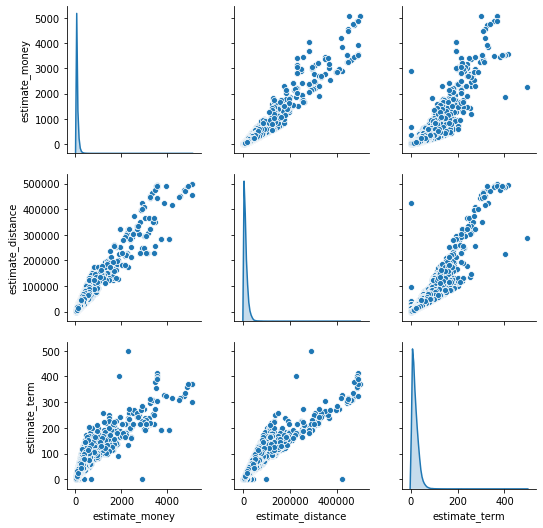

In [81]:
sns.pairplot(train_dataset[["estimate_money", "estimate_distance", "estimate_term"]], diag_kind="kde")

Also look at the overall statistics:

In [83]:
train_dataset.tail()

,id,driver_id,member_id,create_date,create_hour,estimate_money,estimate_distance,estimate_term,start_geo_id,end_geo_id,unreserve,reserved_failed,success
892513,e44192aec850aba13cf5c2487402e351,d85d61f3f03f79018addffdf00bb27a5,ae553431681035373a7743307f9e3a86,2017-07-31,21,69.00,7519.0,15.0,3cdb9ab878fa95e97bb93b2b54de88b3,ba20ac2de22cfe373f316eaa256b85fc,0.0,0.0,1.0
892514,d272e191fe4381cb951f0c41419d9738,d224bbc4936917a1ce2bd40c597298b8,4bcde37117fd1697bbd51b1fbf9d0e0a,2017-07-31,21,56.00,5446.0,10.0,1239d1bfdc532392645d7a37f7469adf,aa0885cb765d5748a3bc5387a1f18b24,0.0,0.0,1.0
892515,952a6654f49582586c8e9ff3ef9db0e7,d41d8cd98f00b204e9800998ecf8427e,56123674426b82d1eff066bfeb01c477,2017-07-31,21,63.92,6594.0,13.0,cebd06f631cf0b3cc33b8fbd4c1617d7,556b1662c246ecc6d548b9050e2c056a,1.0,0.0,0.0
892516,47b3caf9328d26045f8a1d22b9bae966,ab0ad21cdacf6435190a376bf356d122,99d7972a12e6136bcb03c6b638f0012c,2017-07-31,22,92.00,13962.0,24.0,7edf4edc378fa94ec51173f9e59b6a48,aa532f0935c3f7f5d2f1f337125998a0,0.0,0.0,1.0
892517,fb4b75fb5869e6c6d6dd1deb1f2cd918,500e690ac692529db304a6d6146ba505,0c2eef3e84101527ef3662a49e24208c,2017-07-31,23,244.00,44103.0,43.0,2439f5972a0b65da303397c790dca20d,c74e88fd881dc512d63aa6de1986dde5,0.0,0.0,1.0


In [84]:
train_stats = train_dataset.describe()
train_stats.pop("estimate_money")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
create_hour,892518.0,14.214483,5.773804,0.0,9.0,15.0,19.0,23.0
estimate_distance,892518.0,11039.595595,9939.829272,0.0,4777.0,8468.0,14603.0,499426.0
estimate_term,892518.0,19.397473,14.302898,0.0,9.0,16.0,26.0,497.0
unreserve,892518.0,0.245414,0.430332,0.0,0.0,0.0,0.0,1.0
reserved_failed,892518.0,0.189063,0.391559,0.0,0.0,0.0,0.0,1.0
success,892518.0,0.565524,0.495688,0.0,0.0,1.0,1.0,1.0


### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [14]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### Normalize the data

Look again at the `train_stats` block above and note how different the ranges of each feature are.

It is good practice to normalize features that use different scales and ranges. Although the model *might* converge without feature normalization, it makes training more difficult, and it makes the resulting model dependent on the choice of units used in the input.

Note: Although we intentionally generate these statistics from only the training dataset, these statistics will also be used to normalize the test dataset. We need to do that to project the test dataset into the same distribution that the model has been trained on.

In [15]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

This normalized data is what we will use to train the model.

Caution: The statistics used to normalize the inputs here (mean and standard deviation) need to be applied to any other data that is fed to the model, along with the one-hot encoding that we did earlier.  That includes the test set as well as live data when the model is used in production.

## The model

### Build the model

Let's build our model. Here, we'll use a `Sequential` model with two densely connected hidden layers, and an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [16]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [17]:
model = build_model()

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________



Now try out the model. Take a batch of `10` examples from the training data and call `model.predict` on it.

In [19]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.07696093],
       [-0.22839378],
       [-0.26313013],
       [-0.24001728],
       [-0.2501344 ],
       [-0.14837112],
       [-0.2782847 ],
       [ 0.28267416],
       [-0.02616448],
       [-0.17206685]], dtype=float32)

It seems to be working, and it produces a result of the expected shape and type.

### Train the model

Train the model for 1000 epochs, and record the training and validation accuracy in the `history` object.

In [20]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualize the model's training progress using the stats stored in the `history` object.

In [21]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,3.145579,1.176461,3.145579,9.293846,2.259158,9.293846,995
996,3.244271,1.187563,3.244271,8.998797,2.252367,8.998796,996
997,3.334478,1.219777,3.334477,8.993284,2.240390,8.993284,997
998,3.241860,1.166121,3.241860,8.646852,2.200708,8.646852,998
999,3.190398,1.216506,3.190398,8.841792,2.350644,8.841793,999


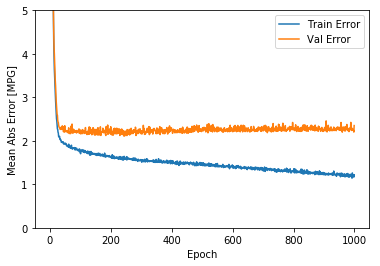

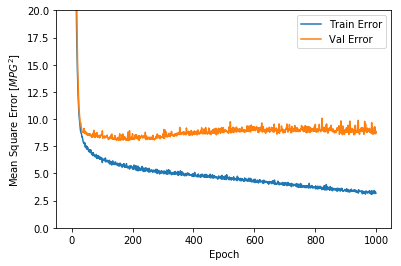

In [22]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the `model.fit` call to automatically stop training when the validation score doesn't improve. We'll use an *EarlyStopping callback* that tests a training condition for  every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

You can learn more about this callback [here](https://www.tensorflow.org/versions/master/api_docs/python/tf/keras/callbacks/EarlyStopping).


....................................................................................................
....................

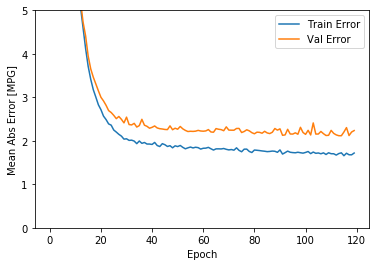

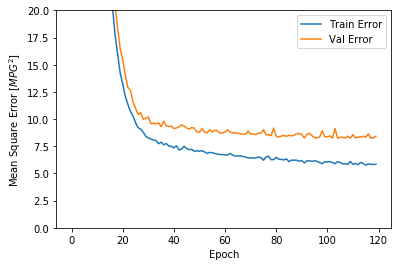

In [23]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

The graph shows that on the validation set, the average error is usually around +/- 2 MPG. Is this good? We'll leave that decision up to you.

Let's see how well the model generalizes by using the **test** set, which we did not use when training the model.  This tells us how well we can expect the model to predict when we use it in the real world.

In [24]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.79 MPG


### Make predictions

Finally, predict MPG values using data in the testing set:

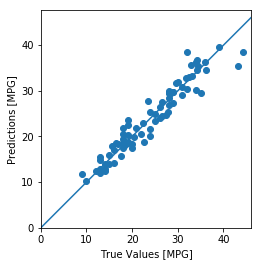

In [25]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


It looks like our model predicts reasonably well. Let's take a look at the error distribution.

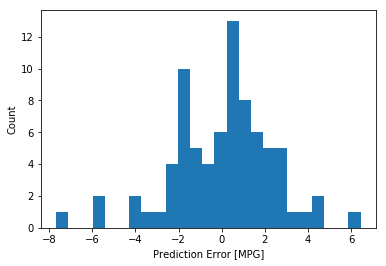

In [26]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

It's not quite gaussian, but we might expect that because the number of samples is very small.

## Conclusion

This notebook introduced a few techniques to handle a regression problem.

* Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).
* Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).
* When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
* If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting.
* Early stopping is a useful technique to prevent overfitting.